In [1]:
import pandas as pd 

smoothing_percent = pd.read_csv("include_all_zeros_percent_smooth.csv")
smoothing_methycount = pd.read_csv("include_all_zeros.csv")


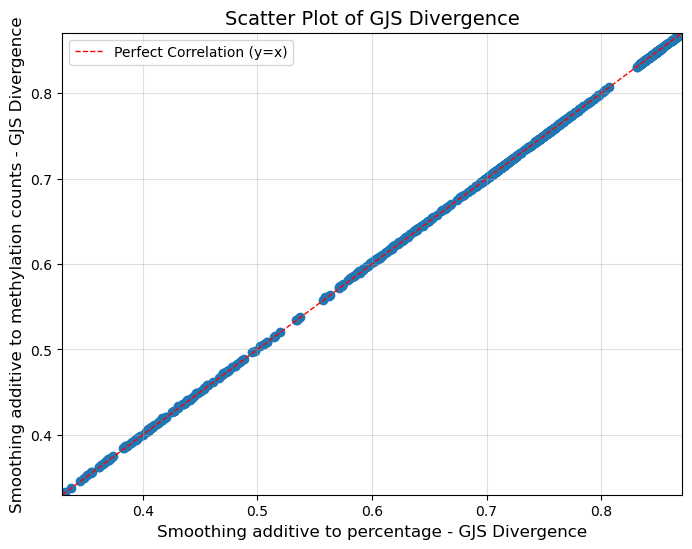

In [13]:
import matplotlib.pyplot as plt
import numpy as np

min_val = min(smoothing_percent["SGJS Divergence"].min(), smoothing_methycount["SGJS Divergence"].min())
max_val = max(smoothing_percent["SGJS Divergence"].max(), smoothing_methycount["SGJS Divergence"].max())

plt.figure(figsize=(8, 6)) 
plt.scatter(smoothing_percent["SGJS Divergence"], smoothing_methycount["SGJS Divergence"]) 
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# Perfect Correlation Line
x = np.linspace(min_val, max_val, 100)
y = x
plt.plot(x, y, color='red', linestyle='dashed', linewidth=1, label='Perfect Correlation (y=x)')

plt.xlabel("Smoothing additive to percentage - GJS Divergence", fontsize=12)
plt.ylabel("Smoothing additive to methylation counts - GJS Divergence", fontsize=12)
plt.title("Scatter Plot of GJS Divergence", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.4) 

plt.show()



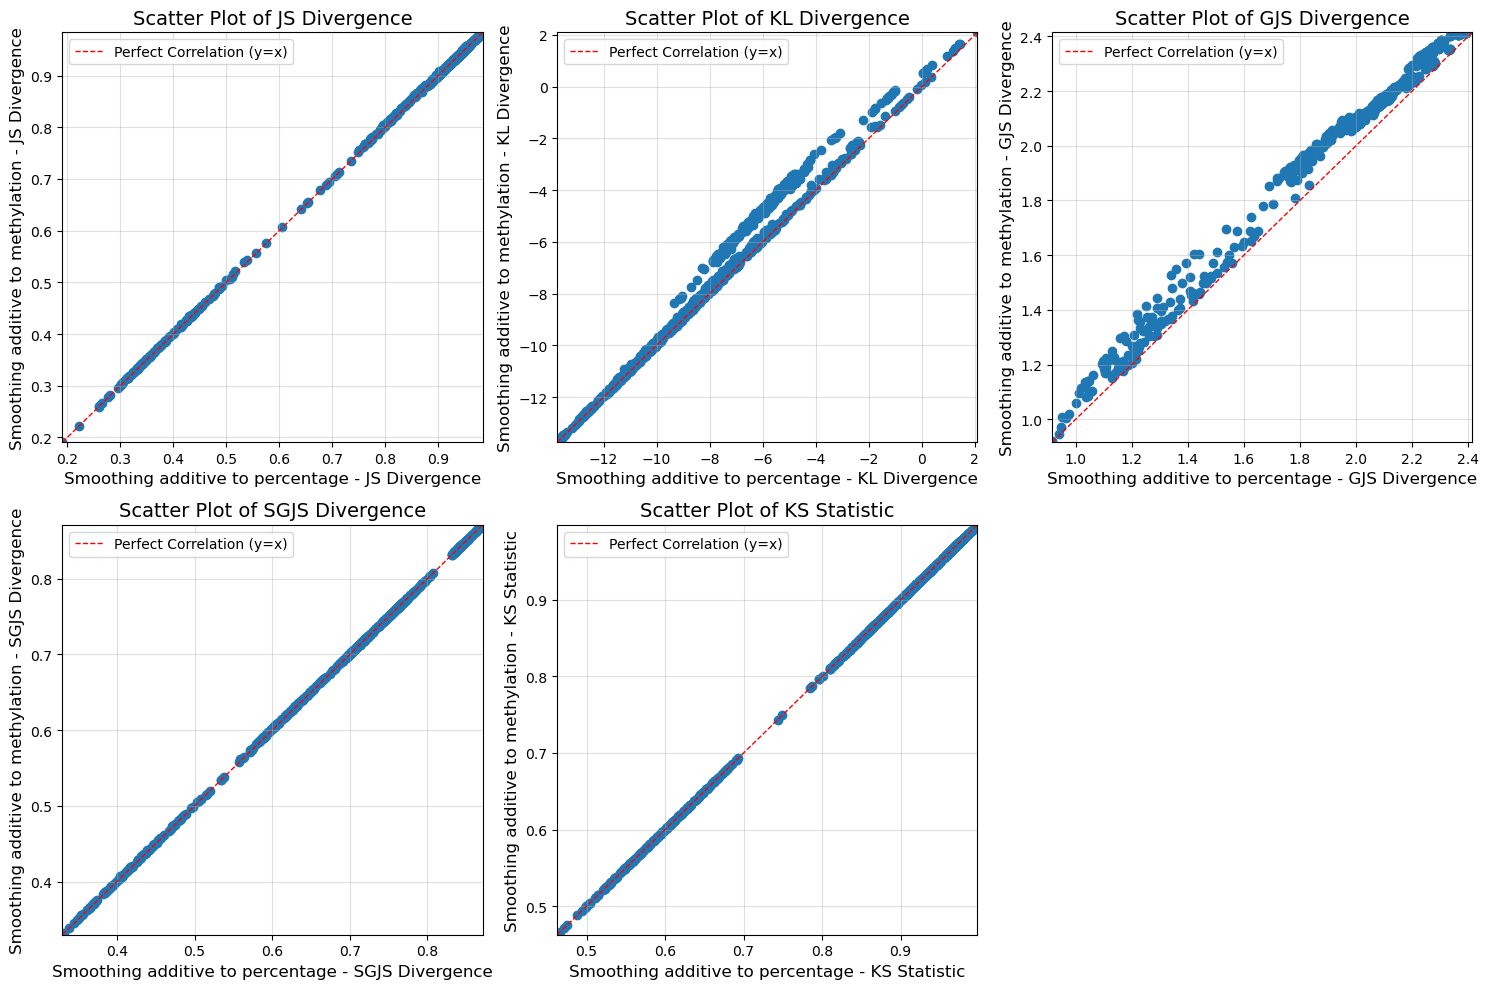

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


divergence_metrics = ["JS Divergence", "KL Divergence", "GJS Divergence", "SGJS Divergence", "KS Statistic"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  

for i, metric in enumerate(divergence_metrics):
    ax = axes[i] 

    min_val = smoothing_percent[metric].min()
    max_val = smoothing_methycount[metric].max()

    ax.scatter(smoothing_percent[metric], smoothing_methycount[metric])

    ax.set_xlim([min_val, max_val])
    ax.set_ylim([min_val, max_val])
    ax.set_xlabel(f"Smoothing additive to percentage - {metric}", fontsize=12)
    ax.set_ylabel(f"Smoothing additive to methylation - {metric}", fontsize=12)
    ax.set_title(f"Scatter Plot of {metric}", fontsize=14)

    # Add perfect correlation line
    x = np.linspace(min_val, max_val, 100)
    ax.plot(x, x, color='red', linestyle='dashed', linewidth=1, label='Perfect Correlation (y=x)')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.4)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()


In [4]:
diff = smoothing_percent["SGJS Divergence"].compare(smoothing_methycount["SGJS Divergence"])


In [6]:
diff["diff"] = diff["self"] - diff["other"]

In [8]:
diff["diff"]

0     -0.000141
1     -0.000059
2     -0.000170
3     -0.000406
4     -0.000059
         ...   
835   -0.000229
836   -0.000387
837   -0.000049
838   -0.000055
839   -0.000119
Name: diff, Length: 840, dtype: float64